In [2]:
import pandas as pd
import numpy as np
import scipy.io as sp
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, precision_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

In [3]:
#Chargement du fichier
excel_file = pd.ExcelFile('Dataframe_2_splits_collee.xlsx') 
df_from_excel = excel_file.parse('Sheet1') 
display(df_from_excel)

,Unnamed: 0,Nombre estimateurs,Max Samples,Contamination,Max Features,F1 score,recall,precision,accuracy,AUC,numero fold
0,1,1,1,0.01,1,0.000,0.0,0.000,0.649,0.500,1
1,2,1,1,0.01,2,0.000,0.0,0.000,0.649,0.500,1
2,3,1,1,0.01,3,0.000,0.0,0.000,0.649,0.500,1
3,4,1,1,0.01,4,0.000,0.0,0.000,0.649,0.500,1
4,5,1,1,0.01,5,0.000,0.0,0.000,0.649,0.500,1
...,...,...,...,...,...,...,...,...,...,...,...
25195,25196,500,300,0.50,5,0.824,1.0,0.700,0.850,0.885,2
25196,25197,500,300,0.50,6,0.841,1.0,0.726,0.868,0.899,2
25197,25198,500,300,0.50,7,0.826,1.0,0.704,0.853,0.887,2
25198,25199,500,300,0.50,8,0.815,1.0,0.688,0.842,0.878,2


In [125]:
#Chargement du fichier avec 0.35
excel_file = pd.ExcelFile('Dataframe_2_splits_0_35.xlsx') 
df_from_excel2 = excel_file.parse('Sheet1') 
df_from_excel_good2=df_from_excel2.drop(["Unnamed: 0"], axis = 1)
display(df_from_excel_good2)

,Nombre estimateurs,Max Samples,Contamination,Max Features,F1 score,recall,precision,accuracy,AUC,numero fold
0,1.0,1.0,0.01,1.0,0.000,0.0,0.000,0.649,0.500,1.0
1,1.0,1.0,0.01,2.0,0.000,0.0,0.000,0.649,0.500,1.0
2,1.0,1.0,0.01,3.0,0.000,0.0,0.000,0.649,0.500,1.0
3,1.0,1.0,0.01,4.0,0.000,0.0,0.000,0.649,0.500,1.0
4,1.0,1.0,0.01,5.0,0.000,0.0,0.000,0.649,0.500,1.0
...,...,...,...,...,...,...,...,...,...,...
26995,500.0,300.0,0.50,5.0,0.812,1.0,0.684,0.839,0.876,2.0
26996,500.0,300.0,0.50,6.0,0.829,1.0,0.708,0.856,0.890,2.0
26997,500.0,300.0,0.50,7.0,0.829,1.0,0.708,0.856,0.890,2.0
26998,500.0,300.0,0.50,8.0,0.832,1.0,0.713,0.859,0.892,2.0


In [128]:
#application du filtre pour déterminer les combinaisons candidates à la best combi avec c =0.35
filtered_values_fold_bis = np.where((df_from_excel_good2['F1 score']>=0.979))

df_best_values_fold2 = df_from_excel_good2.iloc[filtered_values_fold_bis].sort_values(by=['F1 score'], ascending=False)
display(df_best_values_fold2)

,Nombre estimateurs,Max Samples,Contamination,Max Features,F1 score,recall,precision,accuracy,AUC,numero fold
21982,80.0,20.0,0.35,5.0,0.983,0.975,0.991,0.988,0.985,2.0
19278,40.0,20.0,0.35,1.0,0.983,0.983,0.983,0.988,0.987,2.0
22384,80.0,50.0,0.35,2.0,0.979,0.983,0.975,0.985,0.985,2.0
26032,500.0,20.0,0.35,5.0,0.979,0.975,0.983,0.985,0.983,2.0
24684,300.0,20.0,0.35,7.0,0.979,0.966,0.991,0.985,0.981,2.0
24680,300.0,20.0,0.35,3.0,0.979,0.966,0.991,0.985,0.981,2.0
24544,300.0,10.0,0.35,2.0,0.979,0.966,0.991,0.985,0.981,2.0
23471,100.0,30.0,0.35,9.0,0.979,0.975,0.983,0.985,0.983,2.0
23469,100.0,30.0,0.35,7.0,0.979,0.975,0.983,0.985,0.983,2.0
23330,100.0,20.0,0.35,3.0,0.979,0.966,0.991,0.985,0.981,2.0


In [4]:
# retirer la colonne inutile
df_from_excel_good=df_from_excel.drop(["Unnamed: 0"], axis = 1)
display(df_from_excel_good)

,Nombre estimateurs,Max Samples,Contamination,Max Features,F1 score,recall,precision,accuracy,AUC,numero fold
0,1,1,0.01,1,0.000,0.0,0.000,0.649,0.500,1
1,1,1,0.01,2,0.000,0.0,0.000,0.649,0.500,1
2,1,1,0.01,3,0.000,0.0,0.000,0.649,0.500,1
3,1,1,0.01,4,0.000,0.0,0.000,0.649,0.500,1
4,1,1,0.01,5,0.000,0.0,0.000,0.649,0.500,1
...,...,...,...,...,...,...,...,...,...,...
25195,500,300,0.50,5,0.824,1.0,0.700,0.850,0.885,2
25196,500,300,0.50,6,0.841,1.0,0.726,0.868,0.899,2
25197,500,300,0.50,7,0.826,1.0,0.704,0.853,0.887,2
25198,500,300,0.50,8,0.815,1.0,0.688,0.842,0.878,2


In [5]:
#application du filtre pour déterminer les combinaisons candidates à la best combi
filtered_values_fold = np.where((df_from_excel_good['F1 score']>=0.97))
#filtered_values_fold_2 = np.where((df_from_excel_good['F1 score']>=0.9) & (df_from_excel_good['numero fold'] == 2))
#df_best_values_fold_1 = df_from_excel_good.iloc[filtered_values_fold].sort_values(by=['AUC'], ascending=False)
df_best_values_fold = df_from_excel_good.iloc[filtered_values_fold].sort_values(by=['F1 score'], ascending=False)
display(df_best_values_fold)

,Nombre estimateurs,Max Samples,Contamination,Max Features,F1 score,recall,precision,accuracy,AUC,numero fold
17119,30,50,0.4,2,0.979,1.000,0.960,0.985,0.989,2
16745,30,20,0.4,6,0.975,0.992,0.959,0.982,0.985,2
18256,40,40,0.4,5,0.975,1.000,0.952,0.982,0.986,2
19387,50,30,0.4,2,0.975,0.992,0.959,0.982,0.985,2
14102,10,10,0.4,9,0.971,0.992,0.952,0.979,0.982,2
15735,20,40,0.4,4,0.971,0.992,0.952,0.979,0.982,2
16995,30,40,0.4,4,0.971,0.992,0.952,0.979,0.982,2
17373,30,100,0.4,4,0.971,1.000,0.944,0.979,0.984,2
17376,30,100,0.4,7,0.971,0.983,0.959,0.979,0.980,2
18131,40,30,0.4,6,0.971,1.000,0.944,0.979,0.984,2


plage_estimateur =[30, 30, 40, 50, 10, 20, 30, 30, 30, 40]
plage_samples = [50, 20, 40, 30, 10, 40, 40, 100, 100, 30]
plage_features = [2, 6, 5, 2, 9, 4, 4, 4, 7, 6]
plage_contamination = [0.4]

In [116]:
dataSet = sp.loadmat('breastw.mat')
X = dataSet['X']
y = dataSet['y']

Contamination = [0.35]
nombre_estim =[30,30,40,50,10,20,30,30,30,40]
MS=[50,20,40,30,10,40,40,100,100,30]
plage_features = [2,6,5,2,9,4,4,4,7,6]
skf = StratifiedKFold(n_splits=10) 
fold=0
for i in range(0,10) : 
        test=False
        for train_index, test_index in skf.split(X, y):
                fold=fold+1
                X_train, X_test = X[train_index,:], X[test_index,:]
                y_train, y_test = y[train_index], y[test_index]
                model = IsolationForest(contamination=Contamination[0], n_estimators=nombre_estim[i], max_samples=MS[i],max_features=plage_features[i])
                model.fit(X_train)
                y_pred=model.predict(X_test)
                y_pred[y_pred>0]=0
                y_pred[y_pred<0]=1
                F1=round(f1_score(y_test,y_pred),3)
                if test == False :
                        matrice = np.array([[F1]])
                        test = True
                else :
                        matrice = np.append(matrice,np.array([F1]).reshape(1,1),axis=0)
        if i == 0  :
                df=pd.DataFrame(matrice,columns=['[{},{},{},{}]'.format(round(Contamination[0],3),nombre_estim[i],MS[i],plage_features[i])])
        else :
                df1=pd.DataFrame(matrice,columns=['[{},{},{},{}]'.format(round(Contamination[0],3),nombre_estim[i],MS[i],plage_features[i])])
                df=pd.concat([df, df1], axis = 1)
display(df)                  

,"[0.35,30,50,2]","[0.35,30,20,6]","[0.35,40,40,5]","[0.35,50,30,2]","[0.35,10,10,9]","[0.35,20,40,4]","[0.35,30,40,4]","[0.35,30,100,4]","[0.35,30,100,7]","[0.35,40,30,6]"
0,0.960,0.894,0.898,0.958,0.857,0.917,0.870,0.885,0.885,0.939
1,0.941,0.936,0.936,0.920,0.857,0.875,0.958,0.880,0.941,0.898
2,0.902,0.941,0.939,0.917,0.960,0.960,0.960,0.923,0.960,0.939
3,0.894,0.894,0.936,0.894,0.894,0.913,0.933,0.844,0.933,0.913
4,0.917,0.939,0.917,0.960,0.917,0.939,0.936,0.875,0.960,0.980
5,0.980,0.958,0.936,0.939,0.917,0.939,0.917,0.939,0.917,0.889
6,0.980,1.000,0.958,0.957,0.875,0.909,0.958,0.913,0.913,1.000
7,1.000,1.000,0.957,1.000,0.958,0.958,0.960,1.000,0.979,0.979
8,0.979,0.979,0.979,0.979,0.870,0.979,0.979,0.979,0.979,0.958
9,0.960,0.980,0.958,1.000,1.000,0.980,0.936,0.980,0.980,0.980


In [117]:
df.describe(percentiles = [])

,"[0.35,30,50,2]","[0.35,30,20,6]","[0.35,40,40,5]","[0.35,50,30,2]","[0.35,10,10,9]","[0.35,20,40,4]","[0.35,30,40,4]","[0.35,30,100,4]","[0.35,30,100,7]","[0.35,40,30,6]"
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.951300,0.952100,0.941400,0.952400,0.910500,0.936900,0.940700,0.921800,0.944700,0.947500
std,0.036414,0.038631,0.023047,0.035343,0.049101,0.033657,0.030685,0.052168,0.032582,0.038266
min,0.894000,0.894000,0.898000,0.894000,0.857000,0.875000,0.870000,0.844000,0.885000,0.889000
50%,0.960000,0.949500,0.937500,0.957500,0.905500,0.939000,0.947000,0.918000,0.950500,0.948500
max,1.000000,1.000000,0.979000,1.000000,1.000000,0.980000,0.979000,1.000000,0.980000,1.000000


In [28]:
means=df.mean()
print(means)

[0.4,30,50,2]     0.923125
[0.4,30,20,6]     0.932750
[0.4,40,40,5]     0.928375
[0.4,50,30,2]     0.923125
[0.4,10,10,9]     0.872500
[0.4,20,40,4]     0.938250
[0.4,30,40,4]     0.938000
[0.4,30,100,4]    0.921375
[0.4,30,100,7]    0.930375
[0.4,40,30,6]     0.923375
dtype: float64


In [42]:
#from scipy.stats import f_oneway
from scipy.stats import kruskal
t,p = kruskal(df['[0.4,30,50,2]'],df['[0.4,30,20,6]'],df['[0.4,40,40,5]'],df['[0.4,50,30,2]'],df['[0.4,10,10,9]'],df['[0.4,20,40,4]'],df['[0.4,30,40,4]'],df['[0.4,30,100,4]'],df['[0.4,30,100,7]'], df['[0.4,40,30,6]'])
print('t statistic: %.3f' % t)
print('p value: %.13f' % p)

t statistic: 2.017
p value: 0.9911977075125


On a p = 0,77 > 0,05 donc il n'y a pas de différence significative. Les différentes combinaisons sont donc relativements équivalentes.

<function matplotlib.pyplot.show(close=None, block=None)>

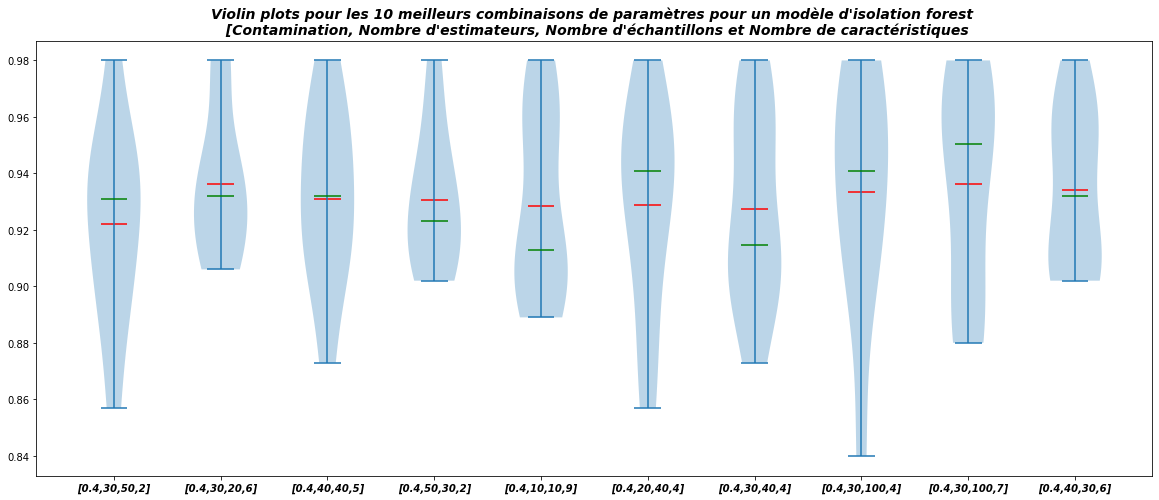

In [41]:
import matplotlib.pyplot as plt
#https://stackabuse.com/matplotlib-violin-plot-tutorial-and-examples/
pos   = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
label = ['[0.4,30,50,2]','[0.4,30,20,6]','[0.4,40,40,5]','[0.4,50,30,2]','[0.4,10,10,9]',\
  '[0.4,20,40,4]','[0.4,30,40,4]','[0.4,30,100,4]','[0.4,30,100,7]','[0.4,40,30,6]']		

fig, ax = plt.subplots(figsize = (20,8))
plot = plt.violinplot(df,showmedians=True, showmeans = True, showextrema = True)
ax.set_xticks(pos)
ax.set_xticklabels(label, size = 10, fontstyle ='italic', fontweight="bold")
ax.set_title("Violin plots pour les 10 meilleurs combinaisons de paramètres pour un modèle d'isolation forest \n [Contamination, Nombre d'estimateurs, Nombre d'échantillons et Nombre de caractéristiques",  size = 14, fontstyle ='italic', fontweight="bold")
plot['cmeans'].set_color('r')
plot['cmedians'].set_color('g')
plt.show


In [9]:
# Comparaison modèle LOF et isolation forest sur une des meilleurs combinaisons :
# pour isolation forest : [0.4,30,100,7] 
# pour LOF  : [0.6,manhattan,0.357]
compare_model = pd.DataFrame([], columns = ['IF: [0.4,30,100,7]', 'LOF : [0.6,manhattan,0.357]']) 
compare_model[['IF: [0.4,30,100,7]']] = df[['[0.4,30,100,7]']]
compare_model[['LOF : [0.6,manhattan,0.357]']] = [[0.951], [0.951], [0.918], [0.949], [0.967], [0.967], [0.967], [1.000]]
display(compare_model)
t,p = kruskal(compare_model[['IF: [0.4,30,100,7]']],compare_model[['LOF : [0.6,manhattan,0.357]']])
print('t statistic: %.3f' % t)
print('p value: %.13f' % p)


,"IF: [0.4,30,100,7]","LOF : [0.6,manhattan,0.357]"
0,0.923,0.951
1,0.923,0.951
2,0.882,0.918
3,0.951,0.949
4,0.938,0.967
5,0.968,0.967
6,0.938,0.967
7,0.984,1.000


t statistic: 1.354
p value: 0.2444968573844


On a p = 0,24 > 0,05 donc il n'y a pas de différence significative. Les ddeux modèles sont donc relativements équivalents.

<function matplotlib.pyplot.show(close=None, block=None)>

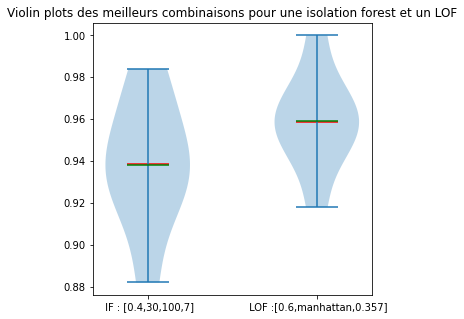

In [11]:

pos   = [1, 2]
label = [' IF : [0.4,30,100,7]',' LOF :[0.6,manhattan,0.357]']		

fig, ax = plt.subplots(figsize = (5,5))
plot = plt.violinplot(compare_model,showmedians=True, showmeans = True, showextrema = True)
ax.set_xticks(pos)
ax.set_xticklabels(label)
ax.set_title("Violin plots des meilleurs combinaisons pour une isolation forest et un LOF")
plot['cmeans'].set_color('r')
plot['cmedians'].set_color('g')
plt.show

In [ ]:
# ValueError: Columns must be same length as key
#https://cumsum.wordpress.com/2021/06/01/pandas-valueerror-columns-must-be-same-length-as-key/

In [17]:
display(df['[0.4,30,100,7]'])

0    0.923
1    0.938
2    0.857
3    0.967
4    0.938
5    0.968
6    0.938
7    0.968
Name: [0.4,30,100,7], dtype: float64

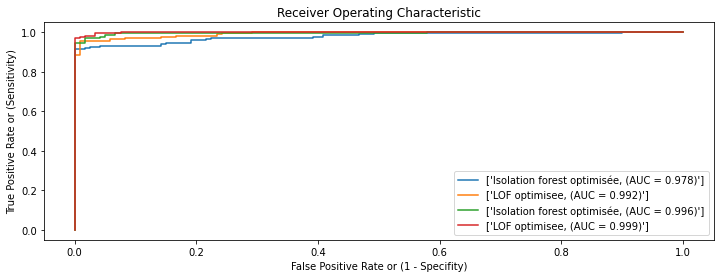

In [22]:
#Comparaison LOF IForest :
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
skf = StratifiedKFold(n_splits=2)
i = 0
from sklearn.metrics import roc_curve, auc
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    Lof_optimisee = LocalOutlierFactor(n_neighbors= round(len(X_test)*0.6), algorithm='auto', contamination=0.357, metric='manhattan')
    iForest_optimisee = IsolationForest(n_estimators = 30, max_samples = 100, contamination = 0.4, max_features = 7)
    iForest_optimisee.fit(X_train)
    y_pred_defaut_iForest=iForest_optimisee.predict(X_test)
    y_pred_defaut_lof=Lof_optimisee.fit_predict(X_test)
    y_pred_defaut_iForest[y_pred_defaut_iForest>0]=0           
    y_pred_defaut_iForest[y_pred_defaut_iForest<0]=1

   
    y_scores_iForest= iForest_optimisee.score_samples(X_test)
    y_scores_lof = Lof_optimisee.negative_outlier_factor_
    tpr_iForest, fpr_iForest, threshold_iForest = roc_curve(y_test, y_scores_iForest)
    tpr_lof, fpr_lof, threshold_lof = roc_curve(y_test, y_scores_lof)
    roc_auc_iForest = auc (fpr_iForest, tpr_iForest)
    roc_auc_lof = auc(fpr_lof, tpr_lof)
    #print(test)
    #plt.plot(fpr_defaut, tpr_defaut, label=['Isolation forest par defaut, split n°:'  %i,  "(AUC = %0.3f)" % roc_auc_defaut])
    #plt.plot(fpr_optimisee, tpr_optimisee, label=['Isolation forest optimisee, split n°:' %i,  "(AUC = %0.3f)" % roc_auc_optimisee])
    plt.plot(fpr_iForest, tpr_iForest, label=['Isolation forest optimisée, (AUC = %0.3f)' % roc_auc_iForest])
    plt.plot(fpr_lof, tpr_lof, label=['LOF optimisee, (AUC = %0.3f)' % roc_auc_lof])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show
    i=i+1

In [9]:
from sklearn.cluster import KMeans
skf = StratifiedKFold(n_splits=8) 
fold=0 
test=False
for train_index, test_index in skf.split(X, y):
        fold=fold+1
        X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        model =  KMeans(n_clusters = 2, init ='k-means++', n_init = 10, max_iter = 300)
        model.fit(X_train)
        y_pred=model.predict(X_test)
        F1=round(f1_score(y_test,y_pred),3)
        if test == False :
                matrice_kmeans = np.array([[F1]])
                test = True
        else :
                matrice_kmeans = np.append(matrice_kmeans,np.array([F1]).reshape(1,1),axis=0)
        
df_kmeans = pd.DataFrame(matrice_kmeans, columns = ['[{},{},{},{}]'.format(2,'k-means++',10, 300)])
display(df_kmeans)                  

,"[2,k-means++,10,300]"
0,0.836
1,0.893
2,0.000
3,0.024
4,0.024
5,0.966
6,0.046
7,1.000


,"IF: [0.4,30,100,7]","LOF : [0.6,manhattan,0.357]","Kmeans : [2,k-means++,10,300]"
0,0.909,0.951,0.154
1,0.923,0.951,0.111
2,0.896,0.918,0.000
3,0.903,0.949,0.024
4,0.938,0.967,0.024
5,0.984,0.967,0.966
6,0.906,0.967,0.046
7,0.984,1.000,1.000


t statistic: 7.071
p value: 0.0291464510802


<function matplotlib.pyplot.show(close=None, block=None)>

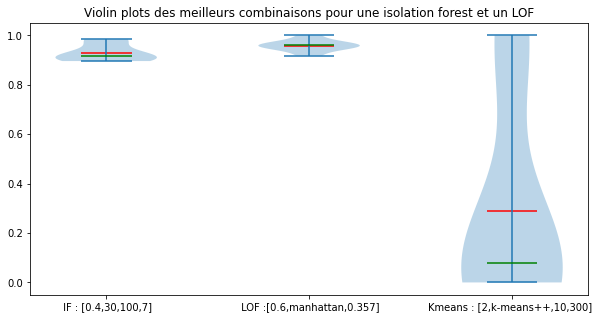

In [43]:
#COmparaison LOf IForest Kmeans
compare_model_total = pd.DataFrame([], columns = ['IF: [0.4,30,100,7]', 'LOF : [0.6,manhattan,0.357]','Kmeans : [2,k-means++,10,300] ']) 
compare_model_total[['IF: [0.4,30,100,7]']] = df[['[0.4,30,100,7]']]
compare_model_total[['Kmeans : [2,k-means++,10,300] ']] = df_kmeans
compare_model_total[['LOF : [0.6,manhattan,0.357]']] = [[0.951], [0.951], [0.918], [0.949], [0.967], [0.967], [0.967], [1.000]]
display(compare_model_total)
t,p = kruskal(compare_model_total[['IF: [0.4,30,100,7]']],compare_model_total[['LOF : [0.6,manhattan,0.357]']], compare_model_total[['Kmeans : [2,k-means++,10,300] ']])
print('t statistic: %.3f' % t)
print('p value: %.13f' % p)



pos   = [1, 2, 3]
label = [' IF : [0.4,30,100,7]',' LOF :[0.6,manhattan,0.357]', 'Kmeans : [2,k-means++,10,300] ']		
fig, ax = plt.subplots(figsize = (10,5))
plot = plt.violinplot(compare_model_total,showmedians=True, showmeans = True, showextrema = True)
ax.set_xticks(pos)
ax.set_xticklabels(label)
ax.set_title("Violin plots des meilleurs combinaisons pour une isolation forest et un LOF")
plot['cmeans'].set_color('r')
plot['cmedians'].set_color('g')
plt.show

In [8]:
# implémentation naïve :

dataSet = sp.loadmat('breastw.mat')
X = dataSet['X']
y = dataSet['y']
skf = StratifiedKFold(n_splits=10)
fold=0 
test=False
for train_index, test_index in skf.split(X, y):
    fold=fold+1
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    model = IsolationForest()
    model.fit(X_train)
    y_pred=model.predict(X_test)
    y_pred[y_pred>0]=0
    y_pred[y_pred<0]=1
    F1=round(f1_score(y_test,y_pred),3)
    if test == False :
        matrice = np.array([[F1]])
        test = True
    else :
        matrice = np.append(matrice,np.array([F1]).reshape(1,1),axis=0)
if i == 0  :
    df=pd.DataFrame(matrice,columns=['[{},{},{},{}]'.format(round(Contamination[0],3),nombre_estim[i],MS[i],plage_features[i])])
else :
    df1=pd.DataFrame(matrice,columns=['[{},{},{},{}]'.format(round(Contamination[0],3),nombre_estim[i],MS[i],plage_features[i])])
    df=pd.concat([df, df1], axis = 1)
display(df)                  
    

NameError: name 'i' is not defined

In [131]:
# cross validation   10 splits avec les 1 0meilleurs combi conta = 0.35

dataSet = sp.loadmat('breastw.mat')
X = dataSet['X']
y = dataSet['y']
Contamination = [0.35]
nombre_estim =[80,40,80,500,300,300,300,100,100,100]
MS=[20,20,50,20,20,20,10,30,30,20]
plage_features = [5,1,2,5,7,3,2,9,7,3]
skf = StratifiedKFold(n_splits=10) 
fold=0
for i in range(0,10) : 
        test=False
        for train_index, test_index in skf.split(X, y):
                fold=fold+1
                X_train, X_test = X[train_index,:], X[test_index,:]
                y_train, y_test = y[train_index], y[test_index]
                model = IsolationForest(contamination=Contamination[0], n_estimators=nombre_estim[i], max_samples=MS[i],max_features=plage_features[i])
                model.fit(X_train)
                y_pred=model.predict(X_test)
                y_pred[y_pred>0]=0
                y_pred[y_pred<0]=1
                F1=round(f1_score(y_test,y_pred),3)
                if test == False :
                        matrice = np.array([[F1]])
                        test = True
                else :
                        matrice = np.append(matrice,np.array([F1]).reshape(1,1),axis=0)
        if i == 0  :
                df_bis=pd.DataFrame(matrice,columns=['[{},{},{},{}]'.format(round(Contamination[0],3),nombre_estim[i],MS[i],plage_features[i])])
        else :
                df_bis1=pd.DataFrame(matrice,columns=['[{},{},{},{}]'.format(round(Contamination[0],3),nombre_estim[i],MS[i],plage_features[i])])
                df_bis=pd.concat([df_bis, df_bis1], axis = 1)
display(df_bis)                  

,"[0.35,80,20,5]","[0.35,40,20,1]","[0.35,80,50,2]","[0.35,500,20,5]","[0.35,300,20,7]","[0.35,300,20,3]","[0.35,300,10,2]","[0.35,100,30,9]","[0.35,100,30,7]","[0.35,100,20,3]"
0,0.894,0.870,0.917,0.894,0.894,0.894,0.894,0.894,0.894,0.894
1,0.894,0.875,0.920,0.875,0.933,0.875,0.913,0.894,0.913,0.957
2,0.920,0.941,0.898,0.941,0.941,0.939,0.941,0.939,0.898,0.920
3,0.917,0.939,0.913,0.917,0.894,0.917,0.917,0.894,0.917,0.894
4,0.958,0.941,0.960,0.958,0.958,0.939,0.958,0.939,0.939,0.958
5,0.980,0.920,0.917,0.958,0.958,0.958,0.870,0.936,0.958,0.939
6,1.000,0.909,0.933,0.979,0.936,0.957,0.979,0.958,0.957,0.936
7,1.000,0.933,1.000,0.979,0.979,0.979,0.979,0.979,1.000,0.979
8,0.979,0.958,0.979,0.979,0.979,0.979,0.979,0.979,0.979,0.979
9,0.980,1.000,1.000,0.980,0.980,1.000,1.000,0.980,0.980,1.000


In [132]:
df_bis.describe(percentiles = [])

,"[0.35,80,20,5]","[0.35,40,20,1]","[0.35,80,50,2]","[0.35,500,20,5]","[0.35,300,20,7]","[0.35,300,20,3]","[0.35,300,10,2]","[0.35,100,30,9]","[0.35,100,30,7]","[0.35,100,20,3]"
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,0.952200,0.928600,0.943700,0.946000,0.945200,0.943700,0.94300,0.939200,0.943500,0.945600
std,0.042055,0.038243,0.037983,0.038474,0.032176,0.039427,0.04304,0.035474,0.037044,0.035886
min,0.894000,0.870000,0.898000,0.875000,0.894000,0.875000,0.87000,0.894000,0.894000,0.894000
50%,0.968500,0.936000,0.926500,0.958000,0.949500,0.948000,0.94950,0.939000,0.948000,0.948000
max,1.000000,1.000000,1.000000,0.980000,0.980000,1.000000,1.00000,0.980000,1.000000,1.000000


In [123]:
#ar = np.array([[0.35]])
#df = pd.DataFrame(ar, index = ['a1'], columns = ['A'])
#display(df)

,A
a1,0.35


In [ ]:
# meilleur combinaison 
model = IsolationForest(contamination = 0.35, n_estimators = 80, max_samples = 20, max_features = 5)
model.fit(X_train) # entrainement du modèle
y_pred=model.predict(X_test) # prédictions sur le jeu de test


In [156]:
# cross validation   10 splits avec la combinaison FINALE

dataSet = sp.loadmat('breastw.mat')
X = dataSet['X']
y = dataSet['y']

skf = StratifiedKFold(n_splits=10) 
fold=0
test=False
for train_index, test_index in skf.split(X, y):
    fold=fold+1
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    model = IsolationForest(contamination = 0.35, n_estimators = 80, max_samples = 20, max_features = 5)
    model.fit(X_train)
    y_pred=model.predict(X_test)
    y_pred[y_pred>0]=0
    y_pred[y_pred<0]=1
    F1=round(f1_score(y_test,y_pred),3)
    if test == False :
        matrice1 = np.array([[F1]])
        test = True
    else :
        matrice1 = np.append(matrice1,np.array([F1]).reshape(1,1),axis=1)
    #if i == 0  :
        df_bis2=pd.DataFrame(matrice1, index = ['IForest'])
    #else :
    #   df_bis1=pd.DataFrame(matrice,columns = 'IForest')
    #    df_bis=pd.concat([df_bis, df_bis1], axis = 1)
display(df_bis2)            

,0,1,2,3,4,5,6,7,8,9
IForest,0.894,0.898,0.941,0.894,0.96,0.917,0.957,0.979,0.958,0.98


In [166]:
df_bis2.T.describe( percentiles =[])

,IForest
count,10.000000
mean,0.937800
std,0.034338
min,0.894000
50%,0.949000
max,0.980000


In [179]:
# cross validation   10 splits avec modèle par défautFINALE

dataSet = sp.loadmat('breastw.mat')
X = dataSet['X']
y = dataSet['y']

skf = StratifiedKFold(n_splits=10) 
fold=0
test=False
for train_index, test_index in skf.split(X, y):
    fold=fold+1
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    model = IsolationForest()
    model.fit(X_train)
    y_pred=model.predict(X_test)
    y_pred[y_pred>0]=0
    y_pred[y_pred<0]=1
    F1=round(f1_score(y_test,y_pred),3)
    if test == False :
        matrice1 = np.array([[F1]])
        test = True
    else :
        matrice1 = np.append(matrice1,np.array([F1]).reshape(1,1),axis=1)
    #if i == 0  :
        df_bis2=pd.DataFrame(matrice1, index = ['IForest'])
    #else :
    #   df_bis1=pd.DataFrame(matrice,columns = 'IForest')
    #    df_bis=pd.concat([df_bis, df_bis1], axis = 1)
display(df_bis2)          

,0,1,2,3,4,5,6,7,8,9
IForest,0.863,0.941,0.941,0.898,0.96,0.96,0.98,0.98,0.979,0.96


In [180]:
df_bis2.T.describe( percentiles =[])

,IForest
count,10.000000
mean,0.946200
std,0.038343
min,0.863000
50%,0.960000
max,0.980000
